# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [5]:
df_states_edu = pd.read_csv("C:/Users/Julio/Downloads/Data Science/MDST-Onboarding-main/data/states_edu.csv")
df_states_edu.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [7]:
df_states_edu.isna().sum()

df_states_edu.rename({
    'GRADES_4_G':'ENROLL_4_G',
    'GRADES_8_G':'ENROLL_8_G',
    'GRADES_12_G':'ENROLL_12_G',
    'GRADES_1_8_G':'ENROLL_1_8_G',
    'GRADES_9_12_G':'ENROLL_9_12_G',
    'GRADES_1_8_G':'ENROLL_1_8_G',
    'GRADES_9_12_G':'ENROLL_9_12_G',
    'GRADES_ALL_G':'ENROLL_ALL_G',
    },
    axis=1,inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Math

How many years of data are logged in our dataset? 

In [11]:

num_years = df_states_edu['YEAR'].nunique()
print(f"There are {num_years} years of data logged in the dataset.")

There are 33 years of data logged in the dataset.


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [17]:
df_michigan = df_states_edu[df_states_edu['STATE'] == 'MICHIGAN']
df_ohio = df_states_edu[df_states_edu['STATE'] == 'OHIO']

avg_michigan_math4 = df_michigan['AVG_MATH_4_SCORE'].mean()
avg_ohio_math4 = df_ohio['AVG_MATH_4_SCORE'].mean()

print(f"Average Grade 4 Math score for Michigan: {avg_michigan_math4}")
print(f"Average Grade 4 Math score for Ohio: {avg_ohio_math4}")

if avg_michigan_math4 > avg_ohio_math4:
    print("Michigan has a higher average Grade 4 Math score.")
elif avg_michigan_math4 < avg_ohio_math4:
    print("Ohio has a higher average Grade 4 Math score.")
else:
    print("Both states have the same average Grade 4 Math score.")

Average Grade 4 Math score for Michigan: 234.36363636363637
Average Grade 4 Math score for Ohio: 239.45454545454547
Ohio has a higher average Grade 4 Math score.


Find the average for your chosen test across all states in 2019

In [18]:
df_2019 = df_states_edu[df_states_edu['YEAR'] == 2019]

avg_score_2019 = df_2019['AVG_MATH_4_SCORE'].mean()

print(f"The average Grade 4 Math score across all states in 2019 is: {avg_score_2019}")

The average Grade 4 Math score across all states in 2019 is: 239.9433962264151


For each state, find a maximum value for your chosen test score

In [19]:
max_scores_by_state = df_states_edu.groupby('STATE')['AVG_MATH_4_SCORE'].max()

print(max_scores_by_state)


STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [21]:
print(df_states_edu[['TOTAL_EXPENDITURE', 'ENROLL']].isna().sum())

df_states_edu['TOTAL_EXPENDITURE'].fillna(df_states_edu['TOTAL_EXPENDITURE'].mean(), inplace=True)
df_states_edu['ENROLL'].fillna(df_states_edu['ENROLL'].mean(), inplace=True)

df_states_edu['expenditure_per_student'] = df_states_edu['TOTAL_EXPENDITURE'] / df_states_edu['ENROLL']

print(df_states_edu[['STATE', 'YEAR', 'expenditure_per_student']].head())

TOTAL_EXPENDITURE    440
ENROLL               491
dtype: int64
        STATE  YEAR  expenditure_per_student
0     ALABAMA  1992                 2.892292
1      ALASKA  1992                 1.059884
2     ARIZONA  1992                 3.707276
3    ARKANSAS  1992                 1.899665
4  CALIFORNIA  1992                29.577768


C:\Users\Julio\AppData\Local\Temp\ipykernel_19208\4259091806.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_states_edu['TOTAL_EXPENDITURE'].fillna(df_states_edu['TOTAL_EXPENDITURE'].mean(), inplace=True)
C:\Users\Julio\AppData\Local\Temp\ipykernel_19208\4259091806.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

Feature engineering justification: I created the expenditure_per_student feature because a state's overall spending on education may affect the resources available for students, which in turn could impact academic performance. By calculating expenditure per student, we can examine whether higher spending correlates with better average test scores, providing insight into the effectiveness of educational funding.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

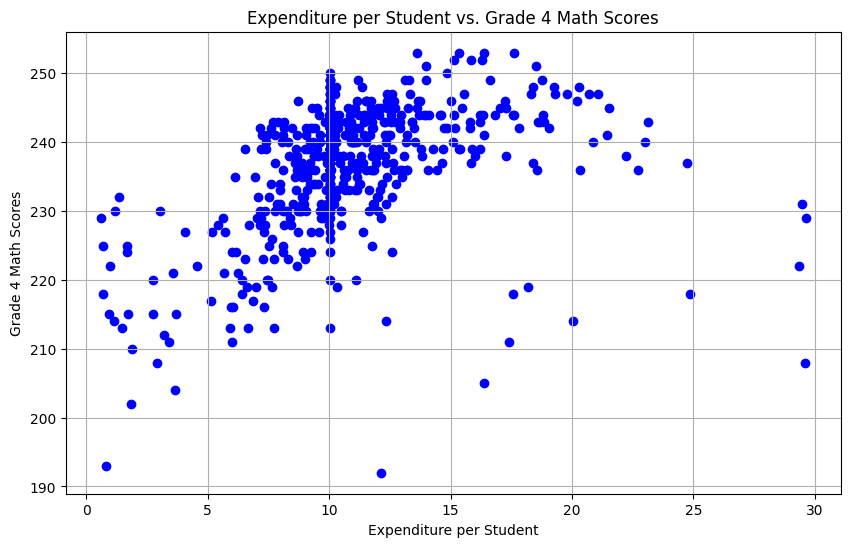

In [22]:
df_states_edu.dropna(subset=['AVG_MATH_4_SCORE', 'expenditure_per_student'], inplace=True)

plt.figure(figsize=(10,6))
plt.scatter(df_states_edu['expenditure_per_student'], df_states_edu['AVG_MATH_4_SCORE'], color='blue')
plt.title('Expenditure per Student vs. Grade 4 Math Scores')
plt.xlabel('Expenditure per Student')
plt.ylabel('Grade 4 Math Scores')
plt.grid(True)
plt.show()

This scatter plot visualizes the relationship between expenditure per student and Grade 4 math scores. It can help us identify whether higher spending per student correlates with better math performance in Grade 4.

**Visualization 2**

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df_states_edu['TOTAL_REVENUE'], df_states_edu['AVG_MATH_4_SCORE'], color='green')
plt.title('Total Revenue vs. Grade 4 Math Scores')
plt.xlabel('Total Revenue')
plt.ylabel('Grade 4 Math Scores')
plt.grid(True)
plt.show()

This scatter plot shows the relationship between total revenue and Grade 4 math scores. It allows us to observe if higher overall state revenue is associated with improved student performance in math at the Grade 4 level.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df_states_edu[['expenditure_per_student', 'TOTAL_REVENUE']]
y = df_states_edu['AVG_MATH_4_SCORE']

In [33]:
X = df_states_edu[['expenditure_per_student', 'TOTAL_REVENUE']]
X.fillna(X.mean(), inplace=True)

y = df_states_edu['AVG_MATH_4_SCORE']
y.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training feature set shape:", X_train.shape)
print("Test feature set shape:", X_test.shape)
print("Training target set shape:", y_train.shape)
print("Test target set shape:", y_test.shape)

Training feature set shape: (452, 2)
Test feature set shape: (113, 2)
Training target set shape: (452,)
Test target set shape: (113,)


C:\Users\Julio\AppData\Local\Temp\ipykernel_19208\267019448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [27]:
# import your sklearn class here

from sklearn.linear_model import LinearRegression


In [28]:
# create your model here
model = LinearRegression()

In [34]:
model.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)

print(y_pred)

[235.80877229 235.80877229 236.88924811 235.80877229 235.80877229
 236.48929926 237.79769046 235.80877229 245.15244913 235.7267635
 234.34209891 236.50346051 238.61343942 236.47256241 235.80877229
 236.87258371 234.36521323 235.80877229 235.80877229 234.82261503
 235.32405545 233.83377389 234.45128812 238.50349419 235.80877229
 235.03736319 228.90359634 234.14961831 235.87142059 236.53332694
 235.80877229 233.41559344 228.56664219 236.95184118 235.80877229
 235.80877229 232.96228475 233.62068602 233.60184637 233.90751273
 239.02793394 238.43493165 237.14471739 236.71811172 236.01394296
 233.37333947 235.80877229 236.90401032 237.67834744 234.22022574
 238.34857479 229.36613076 235.80877229 232.76604128 229.49609786
 237.79720487 235.80877229 240.372542   237.41429438 236.07430213
 233.87402607 234.79130694 235.57184555 236.13682685 236.26887982
 235.80877229 235.80877229 236.3480485  235.74722906 237.13732875
 238.30118019 231.98539216 238.39050129 240.68448072 238.60926211
 237.060920

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [37]:
import matplotlib.pyplot as plt

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

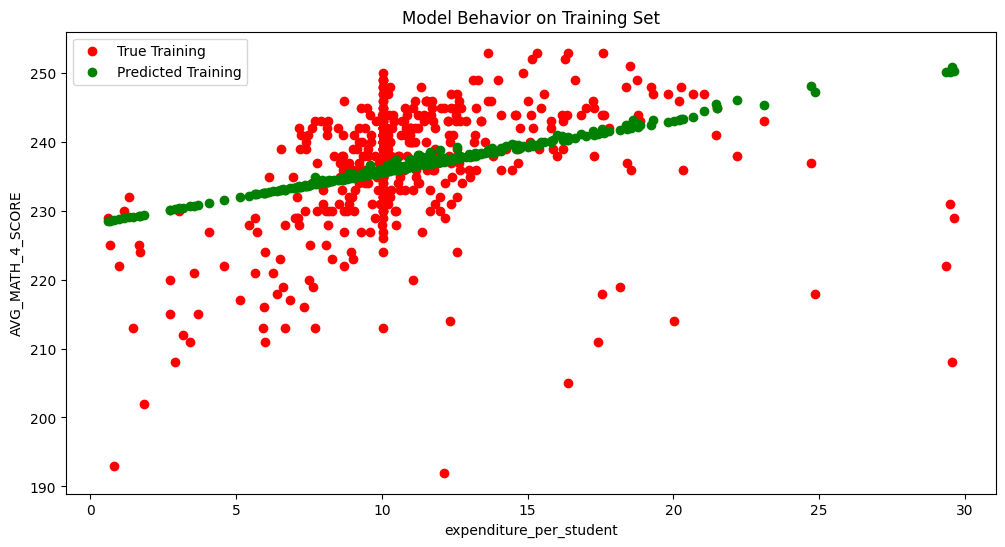

In [38]:
col_name = 'expenditure_per_student'

plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color="red", label='True Training')
plt.scatter(X_train[col_name], model.predict(X_train), color="green", label='Predicted Training')

plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior on Training Set")
plt.legend()

plt.show()


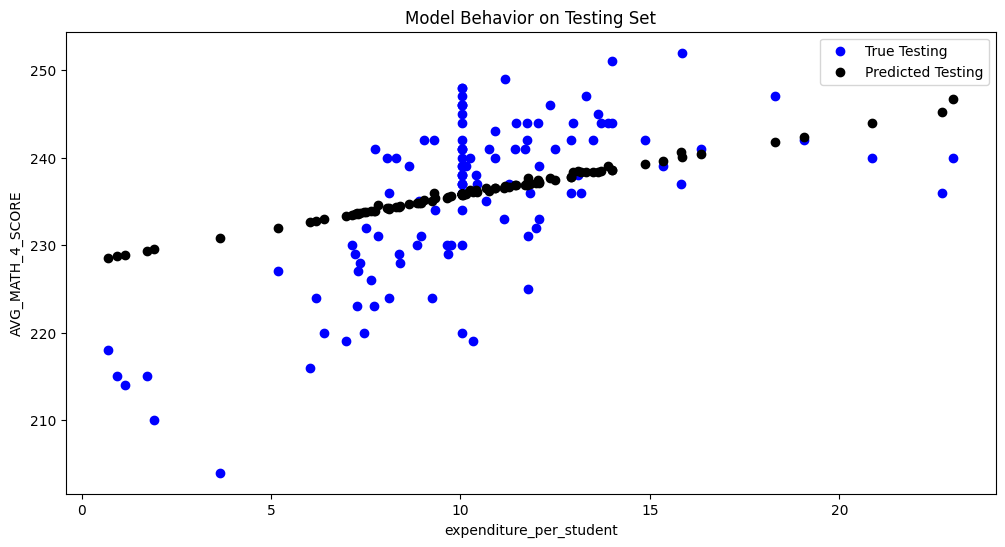

In [39]:
plt.figure(figsize=(12, 6))

plt.scatter(X_test[col_name], y_test, color="blue", label='True Testing')

plt.scatter(X_test[col_name], model.predict(X_test), color="black", label='Predicted Testing')

plt.xlabel(col_name) 
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior on Testing Set")
plt.legend()

plt.show()
